# OSP portfolio optimization problem

5 May 2020

We present here the numerical solution for the portfolio optimization problem on social platforms of small number of nodes, for which the matrix-inversion and the vector-matrix multiplication do not pose calculation difficulties, so we use a direct approach to program the solution.

$\textbf{Model}$: We analyze the budget allocation problem where a user has a budget and decides to assign it to some users in order to maximize his/her influence on the network through the participation of the selected users.

In such a platform, there are $N > 2$ users in total. Each user $n$ is considered as a virtual node and has a Newsfeed and a Wall. Suppose the Newsfeed of size $M > 0$ and the Wall of size $K >0$. Furthermore, each user has a set of leaders, $L^{(n)}$, and she/he can be the leader of others. The Newsfeed of $n$ is refreshed instantaneously by insertion of posts published on the Walls of his Leaders. The user visits his Newsfeed and chooses among the currently available posts to re-post on his own Wall with rate $\mu^{(n)}\geq 0$ [posts/unit-time]. Additionally, he produces own posts on his Wall with rate $\lambda^{(n)}\geq 0$. These posts are marked on their generation by the user-author index $(n)$.

$\textbf{Assumptions}$: The choice of which post to share on one's Wall and which post to evict when a new post arrives is uniformly random, among the present posts on the Wall and the Newsfeed. Also, both post-feed processes per user are assumed Poisson.

Consider a particular user $i$. The steady-state probability to find posts from user $i$ on the Newsfeed and Wall of user $n$ is the tuple $(p_i^{(n)},q_i^{(n)})$. With this, we form the steady state column-vectors

$P_{vec}(i):=(P_{vec}(1,i),\ldots,P_{vec}(N,i))=(p_i^{(1)},\ldots,p_i^{(n)})$, and

$Q_{vec}(i):=(Q_{vec}(1,i),\ldots,Q_{vec}(N,i))=(q_i^{(1)},\ldots,q_i^{(n)})$.

These are the steady-state vectors for posts of origin $(i)$ on all the Newsfeeds and Walls of users.

We define the influence of user $i$ on user $n$, $q^{(n)}_i$, as the steady-state probability that a post found on the Wall of user $n$ is of label $i$, i.e., has been originally created by user $i$. Note that these probabilities are performance parameters that will be the output of the developed models. We propose the following metric of influence, $\Psi_i =\frac{1}{N-1} \sum_{n \not=i} q^{(n)}_i$.

### Linear System solution (Theorem 2 from paper)

Linear System solution (Theorem 2 from paper)
To find the values of the steady-state vectors $P_{vec}(i)$ and $Q_{vec}(i)$, one needs to solve the following linear system (formulas $(12)-(13)$):

$(12) \space P_{vec}(i) = AP_{vec}(i) + b(i)$

$(13) \space Q_{vec}(i) = C_{vec}(i) + d(i).$

In the above $A$, $C$ are $N\times N$ matrices and $b(i)$, $d(i)$ are $N\times 1$ column vectors.

$A(j,k) = \frac{\mu^{(k)}}{\sum_{\ell\in L^{(j)}}\lambda^{(\ell)}+\mu^{(\ell)}}\mathbf{1}(k\in L^{(j)})$,

$b(j,i) = \frac{\lambda^{(i)}}{\sum_{\ell\in L^{(j)}}\lambda^{(\ell)}+\mu^{(\ell)}}\mathbf{1}(i\in L^{(j)})$,

$C(j,i) = \frac{\mu^{(j)}}{\lambda^{(j)}+\mu^{(j)}}\mathbf{1}(j==i)$,

$d(j,i) = \frac{\lambda^{(i)}}{\lambda^{(i)}+\mu^{(i)}}\mathbf{1}(j==i)$.

### Portfolio Optimization Problem on Online Social Platforms
Let's select one element in the user set $ i\in \mathcal{N}=\{ 1,...,N \}$, and let it be the set $ S = \{i \}$ (this set represents the set where we want to analyze how a joint advertising campaign of the other users is directed to the user i). In turn, suppose that for each post rate of user $n$ different from user $i$, we have $\lambda^{(n)}=a_n \lambda^{(n)}+(1-a_n) \lambda^{(n)}, a_n \in [0,1]$, where $a_n$ represents the post rate of user $n$ directed to user $ i $ (that is, directed to advertising) and $1-a_n$ represents the post rate of user $n$ directed to personal use of user $n$.

In our problem framework we have a budget that must not be exceeded $P$, this budget represents the budget limit that the advertising campaign directed to the user $ i $ can cost but don't exceed. Also for each user $ n $, there is a $ c_n $ that represents the cost (in the same scale of $P$) of post over time unit of the user $n$ directed to the advertising campaign. Then the user's individualized budget $ n $ is given by $ P_n = c_n a_n \lambda ^ {(n)}.$

On the other hand, note that if we define the influence of the user $ n \not = i $ directed at advertising towards the set $S $ (denoted by $\Psi_{n,S} (a_n)$), then the only difference between $\Psi_{n, S} (a_n) $ and $ \Psi_n $ is to consider the system as:

$$(\lambda^{(1)},\mu^{(1)}),...,(a_n \lambda^{(n)},\mu^{(n)}) ,...,(\lambda^{(N)},\mu^{(N)}),$$ Instead of: $$(\lambda^{(1)},\mu^{(1)}),...,( \lambda^{(n)},\mu^{(n)}) ,...,(\lambda^{(N)},\mu^{(N)}).$$

In this way, sequentially we can add all the users differents from the user $i$ and so we are interested in maximizing over the set $\{a_n \}_{n \not=i}$ the sum of each influence through the user $ n \not = i $ directed to advertising towards the user $ i $ and the direct influence of the user $ i $, subject to the budget constraint $ P $ not being exceeded by the sum of the individual budgeting of each user $ n \not = i $, namely: 

$$\max_{ \{a_n \}_{n \not=i} } (\sum_{n \in \mathcal{N}\setminus \{i \} } \Psi_{n,S} (a_n) +\Psi_i ), \textbf{subject} \sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)} \leq P .$$

Through our results we saw that $ \Psi_{n,S} (a_n)=a_n \Psi_{n}, \forall n \in \mathcal{N}\setminus \{i \}$, in this way, our problem turns out to be the following optimization problem:

$$\max_{ \{a_n \}_{n \not=i} } (\sum_{n \in \mathcal{N}\setminus \{i \} } a_n \Psi_{n}  +\Psi_i ), \textbf{subject} \sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)} \leq P.$$

which can be solved by linear programming, specifically by the simplex algorithm. Let's note that the restriction $\sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)} \leq P$ can be considered as $\sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)}=P$ cause if we have the strict inequality, we can always increase an $a_l$ such the influence is strictly increased and we continue to maintain the inequality as the restriction.

### Implementation
$\textbf{Notes}$: For the implementation, we first generate an input from graphs of specific form. We choose here to generate a Erdos-Renyi graph, Albert-Barabasi granp, Ring graph and a Grid graph. Furthermore, we allow the choice of self-posting and re-posting rates.

The implementation will fill in the matrices A,C and the vectors b,d for any user and perform the matrix calculations presented in the paper. The methods to solve can be found as Theorem 3 and Theorem 4. The time of convergence of (M1) and (M2) depends on the number of user as well as the maximum number of iterations and the epsilon in the convergence criterion $||p_{neq}-p_{old}||_{\infty}<eps$. We set: $it =1000$ and $eps = 0.0001$ by default. Note that the implementation of (M2) is not sparse and the simple version outperforms (M1) in examples where the graph structure is non-symmetric.

Consequently, we define a cost function in which for each user we estimate the cost per post following the recommendations of the wep-pages https://buffer.com/resources/influencer-marketing-cost, https://buffer.com/library/influencer-marketing-guide and the Instagram money calculator on the web-page https://influencermarketinghub.com/instagram-money-calculator/. That is, the minimum cost that can be paid to an influencer following the recommendations of the estimated of the Instagram money calculator like the cost per post of user $n$ is $\$5\frac{\text{Number of followers}_n}{1000}+\$250\frac{\text{Average Engagments_n}}{1000}$. The average engagments is equivalent in our model to the average number of sharings of label of the user $n$ in our social platform, which is the average of the set composed by the steady-state probabilities that a post found on the Wall of a user $l \not=n$ is of label $n$ times the number of followers of user $n$. So, we have that the cost per post is equal to $\$5\frac{\text{Number of followers}_n}{1000}+\$250\Psi_n \frac{\text{Number of followers}_n}{1000}$. 

Finally, we found the OSP portfolio optimization numerical solutions through the well-known simplex algorithm and through the method desired by the user (M1) or (M2). Let's observe that the python implementation of simplex algorithm gives the basic feasible solution to serve as an optimal solution.

In [1]:
%pylab inline
import math
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import scipy.optimize as opt
import networkx as nx
from numpy import inf

Populating the interactive namespace from numpy and matplotlib


## 1. Input Graphs
We first would like to generate the input graphs for our Social platform.

We propose four graph categories: (I) Erdos-Renyi Graph, (II) Albert-Barabasi Graph, (III) Ring Graph, (IV) Grid Graph.

For each graph, we need to define: (1) number of users $N$, (2) self- and re-post activity rate N-vectors, $L_{vec}$ and $M_{vec}$ (3) Leader graph (either NxN or list), (4) the cost per post for each user and (5) the user $i$ who orchestrates the advertising campaign.

For the special cases Erdos-Renyi, Albert-Barabasi and Ring Graph, a probability $pr$ in Erdos-Renyi graph $G(N,p)$, the number of edges $m$ to attach from a new node to existing nodes in the Barabasi-Albert model and a radius $R$ should also be defined, which determines the number of leaders per user.

In [2]:
# Number of users in Social graph, pr probability in Erdos-Renyi graph G(N,pr) and m is the number of edges to attach from a new node to existing nodes in the Barabasi-Albert model
N=25
m=3
pr=.2

### I. Erdos-Renyi Graph

We fix the probability $pr$ and a Erdos-Renyi graph $G(N,pr)$ is constructed. Namely by connecting nodes randomly with directed edges where each edge is included in the graph with probability $pr$ independent from every other directed edge. 

Note: In this implementation we assume users indexed from $n=0,...N-1$, and we use lists, so that the entry e.g. $R_{vec}[0]$ refers to the number of leaders for user "0", and similarly $R_{vec}[n]$ for user "n".

In [3]:
#Graphs------------------------------------------------------------------------------------------------------------------------
#Erdos-Renyi Graph-------------------------------------------------------------------------------------------------------------
def erdosL_graph(N,p):
    Lead = [list() for j in range(N)]
    for n in range(0,N):
        for m in range(0,N):
            if n!=m:
                aux=np.random.binomial(1,p)
                if aux==1:
                    Lead[n].append(m)
    return Lead
#Erdos Renyi graph with our hypotheses (each user has at least one leader)
def erdos_graph(N,p): 
    Lead = erdosL_graph(N,p)
    for n in range(0,N):
        if len(Lead[n])==0:
            return erdos_graph(N,p)
    return Lead

In [4]:
Lead=erdos_graph(N,pr) #We select graph structure
print("Lead of Erdos-Renyi graph=",Lead)

Lead of Erdos-Renyi graph= [[3, 5, 7, 9, 10, 15, 21, 22, 24], [4, 19, 22], [1, 6, 10, 14, 15, 16, 19], [6, 18, 20, 24], [10, 24], [13, 14], [4, 7, 9, 12, 14, 23], [1, 4, 9, 10, 22, 23], [1, 9, 10, 11, 15], [8, 10, 14, 22], [20], [13, 14, 15, 24], [1, 22, 23], [3, 17, 22], [21], [0, 4, 7, 14, 17, 18, 20], [11, 20, 23], [0, 1, 4, 9, 14, 18, 22], [5, 7, 11, 13, 15, 16, 17, 23], [1, 10, 15, 18], [2, 15, 19, 23], [4, 9, 13, 17], [8, 9, 11, 12, 18, 23], [3, 6, 15], [1, 3, 8, 11, 13, 18, 20]]


We will now draw the produced directed Leader Graph.

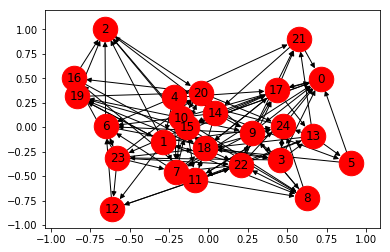

In [5]:
Gring=nx.DiGraph()
for n in range(N):
    ln = list()
    ln = Lead[n]
    for j in range(len(ln)):
        Gring.add_edge(ln[j],n)
pos=nx.spring_layout(Gring,iterations=100)
nx.draw_networkx(Gring,pos,arrows=True,with_labels=True,node_size=600,node_color='r')

### II. Albert-Barabasi Graph

In the Albert-Barabasi graph, we begin with an initial complete network of $m$ nodes and $N-m$ new nodes are added to the network one at a time. Each new node is connected to $m$ existing nodes with a bi-directed edge and a probability that is proportional to the number of links that the existing nodes already have, namely $\frac{\text{degree}_i}{\sum_{j \not=i} \text{degree}_j}$ with $\text{degree}_i$ the degree of user $i$. Then, heavily linked nodes tend to quickly accumulate even more links, while nodes with only a few links are unlikely to be chosen as the destination for a new link. 

In [6]:
#Albert-Barabasi graph---------------------------------------------------------------------------------------------------------
def barabasi_albert(n, m):
    # initialise with a complete graph on m vertices
    Lead=[list() for j in range(N)]
    neighbours=[set(range(m)) - {i} for i in range(m)]
    degrees=[m-1 for i in range(m)]
    for i in range(m, n):
        #Set of new neighbours of user i
        n_neighbours={i for _, i in sorted([(np.random.exponential(w), i) for i, w in enumerate(degrees)])[:m]}
        # add node with back-edges
        neighbours.append(n_neighbours)
        degrees.append(m)
        # add forward-edges
        for j in n_neighbours:
            neighbours[j].add(i)
            degrees[j] += 1
    for i in range(N):
        for j in range(N):
            if j in neighbours[i]:
                Lead[i].append(j)
    return Lead

In [7]:
Lead=barabasi_albert(N, m) #We select graph structure
print("Lead of Albert-Barabasi graph=",Lead)

Lead of Albert-Barabasi graph= [[1, 2, 3, 4, 5, 13, 17], [0, 2, 3, 5, 6, 8, 10, 13, 15, 17], [0, 1, 3, 4, 6, 9, 22], [0, 1, 2, 4, 6, 7, 8, 15], [0, 2, 3, 5, 7, 9, 11, 12], [0, 1, 4, 8, 10, 11], [1, 2, 3, 7, 14, 16], [3, 4, 6, 9, 14, 15, 23], [1, 3, 5, 11, 20, 21], [2, 4, 7, 10, 16, 17, 18], [1, 5, 9, 12, 19, 20], [4, 5, 8, 12, 13, 21], [4, 10, 11, 14, 16], [0, 1, 11, 18, 23], [6, 7, 12, 19, 20, 21], [1, 3, 7, 23], [6, 9, 12, 18, 19], [0, 1, 9, 24], [9, 13, 16], [10, 14, 16, 22], [8, 10, 14], [8, 11, 14, 22, 24], [2, 19, 21], [7, 13, 15, 24], [17, 21, 23]]


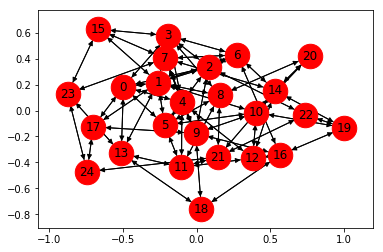

In [8]:
Gring=nx.DiGraph()
for n in range(N):
    ln = list()
    ln = Lead[n]
    for j in range(len(ln)):
        Gring.add_edge(ln[j],n)
pos=nx.spring_layout(Gring,iterations=100)
nx.draw_networkx(Gring,pos,arrows=True,with_labels=True,node_size=600,node_color='r')

### III. Ring Graph
we set the symmetric ring graph. Each node follows $R$ users at his right and left, so that in total she/he has $2R$ leaders. Obviously, $2R<N$.

In [9]:
#Ring graph-------------------------------------------------------------------------------------------------------------------
# Inout Radius
# Defines radius in ring for each user
# Radius scenario 1: random with maximum 2R < N
Rhigh = int(N/2)
Rvec1 = np.random.randint(0,Rhigh+1,N)
#
# Radius scenario 2: all users same radius R
R = 2
Rvec2 = R*np.ones(N)
Rvec2 = Rvec2.astype(int)
#
# Radius scenario 3: all users same radius R except user "0"
Rvec3 = list(Rvec2)
Rvec3[0] = 2
Rvec3 = np.asarray(Rvec3)
Rvec3 = Rvec3.astype(int)
print("Rvec1=",Rvec1,"\n")
print("Rvec2=",Rvec2,"\n")
print("Rvec3=",Rvec3,"\n")

Rvec1= [ 6  2 11  1  6  3  4  3  0  1  0  9  5  0  7  6  4  2  6  1  4 11  6  2
  6] 

Rvec2= [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

Rvec3= [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 



In [10]:
def ring_graph(N, Rvec, lead=1, sym=1):
    # Produces a list of Leaders, i.e. Lead[j] is the list of leaders for node j.
    #
    # The function allows for some variations:
    # Option lead =1: Vector Rvec is for leaders (Rvec[n] is the list of leaders for node n)
    # Option lead =0: Vector Rvec is for followers (Rvec[n]) is the list of followers for node n)
    #
    # Option sym =1: case of symmetric leaders R right and R left of a user
    # Option sym =0: non-symmetric leaders 2R at the right only.
    #
    Lead = list()
    #
    if lead==1 and sym==1:
        for j in range(0,N):
            f = list()
            f.extend((j+(np.arange(Rvec[j])+1))%N)
            f.extend((j-(np.arange(Rvec[j])+1))%N)
            Lead.append(f)
    elif lead==1 and sym==0:
        for j in range(0,N):
            f = list()
            f.extend((j+(np.arange(Rvec[j])+1))%N)
            Lead.append(f)
    elif lead==0 and sym==1:
        for j in range(0,N):
            f = list()
            Lead.append(f)
        for j in range(0,N):
            f = list()
            f.extend((j+(np.arange(Rvec[j])+1))%N)
            f.extend((j-(np.arange(Rvec[j])+1))%N)
            for n in range(len(f)):
                Lead[f[n]].append(j)
    elif lead==0 and sym==0:
        for j in range(0,N):
            f = list()
            Lead.append(f)
        for j in range(0,N):
            f = list()
            f.extend((j+(np.arange(Rvec[j])+1))%N)
            for n in range(len(f)):
                Lead[f[n]].append(j)
    return Lead

In [11]:
LeadRing = ring_graph(N,Rvec1,lead=1,sym=1)
print("Rvec=",Rvec1)
print("LeadRing=",LeadRing)

Rvec= [ 6  2 11  1  6  3  4  3  0  1  0  9  5  0  7  6  4  2  6  1  4 11  6  2
  6]
LeadRing= [[1, 2, 3, 4, 5, 6, 24, 23, 22, 21, 20, 19], [2, 3, 0, 24], [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 0, 24, 23, 22, 21, 20, 19, 18, 17, 16], [4, 2], [5, 6, 7, 8, 9, 10, 3, 2, 1, 0, 24, 23], [6, 7, 8, 4, 3, 2], [7, 8, 9, 10, 5, 4, 3, 2], [8, 9, 10, 6, 5, 4], [], [10, 8], [], [12, 13, 14, 15, 16, 17, 18, 19, 20, 10, 9, 8, 7, 6, 5, 4, 3, 2], [13, 14, 15, 16, 17, 11, 10, 9, 8, 7], [], [15, 16, 17, 18, 19, 20, 21, 13, 12, 11, 10, 9, 8, 7], [16, 17, 18, 19, 20, 21, 14, 13, 12, 11, 10, 9], [17, 18, 19, 20, 15, 14, 13, 12], [18, 19, 16, 15], [19, 20, 21, 22, 23, 24, 17, 16, 15, 14, 13, 12], [20, 18], [21, 22, 23, 24, 19, 18, 17, 16], [22, 23, 24, 0, 1, 2, 3, 4, 5, 6, 7, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10], [23, 24, 0, 1, 2, 3, 21, 20, 19, 18, 17, 16], [24, 0, 22, 21], [0, 1, 2, 3, 4, 5, 23, 22, 21, 20, 19, 18]]


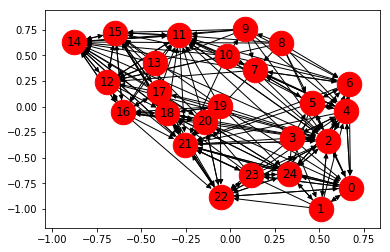

In [12]:
Gring=nx.DiGraph()
for n in range(N):
    ln = list()
    ln = LeadRing[n]
    for j in range(len(ln)):
        Gring.add_edge(ln[j],n)

# Uncomment below to Draw
pos=nx.spring_layout(Gring,iterations=100)
nx.draw_networkx(Gring,pos,arrows=True,with_labels=True,node_size=600,node_color='r')

### IV. Grid graph
In the Grid graph, every node has 4 leaders, except the nodes on the 4 vertices of the Grid who have 2 leaders and the nodes on the edges who have 3.

The size of the grid graph should be such that $\sqrt{N}$ is a postive integer.

In [13]:
#Grid graph---------------------------------------------------------------------------------------------------------------------
def grid_graph(N):
    #
    dim1 = math.sqrt(N)
    #
    # Check validity of Grid size
    if np.abs(dim1-int(dim1))>0:
        return print("not valid graph size N\n")
    #
    dim1 = int(dim1)
    #
    # If size is correct, then produce a list of Leaders.
    # Nodes are indexed from top-left ("0") to bottom-right ("N-1")
    # and in each row the indexing increased from left to right.
    #
    Lead = [list() for j in range(N)]
    #
    # Internal nodes with 4 leaders each.
    for n in range(1,dim1-1):
        for m in range(1,dim1-1):
            indx = dim1*n+m
            Lead[indx].extend([dim1*(n+1)+m, dim1*(n-1)+m, dim1*n+m+1, dim1*n+m-1 ])
    # Four vertices with 2 leaders each.
    Lead[0].extend([1, dim1])
    Lead[dim1-1].extend([dim1-2,dim1*2-1])
    Lead[dim1*(dim1-1)].extend([dim1*(dim1-1)+1,dim1*(dim1-2)])
    Lead[N-1].extend([N-2,dim1*(dim1-1)-1])
    # Remaining nodes on the four edges, not vertices.
    # Top
    for m in range(1,dim1-1):
        Lead[m].extend([m-1,m+1,dim1+m])
    # Bottom
    for m in range(1,dim1-1):
        Lead[dim1*(dim1-1)+m].extend([dim1*(dim1-1)+m-1,dim1*(dim1-1)+m+1,dim1*(dim1-2)+m])
    # Left
    for n in range(1,dim1-1):
        Lead[dim1*n].extend([dim1*n+1,dim1*(n-1),dim1*(n+1)])
    # Right
    for n in range(1,dim1-1):
        Lead[dim1*(n+1)-1].extend([dim1*(n+1)-2,dim1*(n)-1,dim1*(n+2)-1])
    return Lead

In [14]:
Lead=grid_graph(N) #We select graph structure
print("LeadGrid=",Lead)

LeadGrid= [[1, 5], [0, 2, 6], [1, 3, 7], [2, 4, 8], [3, 9], [6, 0, 10], [11, 1, 7, 5], [12, 2, 8, 6], [13, 3, 9, 7], [8, 4, 14], [11, 5, 15], [16, 6, 12, 10], [17, 7, 13, 11], [18, 8, 14, 12], [13, 9, 19], [16, 10, 20], [21, 11, 17, 15], [22, 12, 18, 16], [23, 13, 19, 17], [18, 14, 24], [21, 15], [20, 22, 16], [21, 23, 17], [22, 24, 18], [23, 19]]


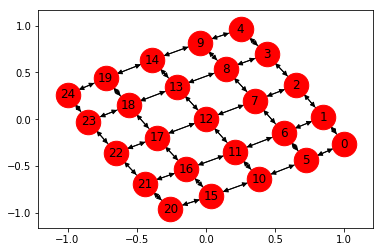

In [15]:
Gring=nx.DiGraph()
for n in range(N):
    ln = list()
    ln = Lead[n]
    for j in range(len(ln)):
        Gring.add_edge(ln[j],n)
pos=nx.spring_layout(Gring,iterations=100)
nx.draw_networkx(Gring,pos,arrows=True,with_labels=True,node_size=600,node_color='r')

## 2. General Input

We first define the general input (1),(2) and (3) related to size and activity. So, we could calculate using (M1) or (M2) the influence metric for each user and then we could get the cost per post (4) for each user and get our basic feasible solution 
through the simplex method.

We give three example options for the activity to post and re-post. These are just input examples, and can be chosen arbitrarily, depending on the scenario to be tested.

In [16]:
#General Input (N, Lvec, Mvec)--------------------------------------------------------------------------------------------------
N=200
print("N=",N,'\n') # network size
# Activity
# Activity Scenario case 1: random activity
Amax = 100 #maximum activity rate in the random choice (case 1)
Lvec1 = np.random.uniform(0,Amax, N)
Mvec1 = np.random.uniform(0,Amax, N)
#
Lvec1 = np.round(Lvec1, 5)
Mvec1 = np.round(Mvec1, 5)
# Activity Scenario case 2: symmetric activity
lam = 1.
mu = 1
Lvec2 = lam*np.ones(N, np.float64)
Mvec2 = mu*np.ones(N, np.float64)
#
# Activity Scenario case 3: asymmetric activity for 1 user
lam1 = 10
mu1 = 0.5
Lvec3 = list(Lvec2)
Mvec3 = list(Mvec2)
Lvec3[0] = lam1
Mvec3[0] = mu1
Lvec3 = np.asarray(Lvec3)
Mvec3 = np.asarray(Mvec3)
#
print("Lvec1=",Lvec1,"\n","Mvec1=",Mvec1,"\n")
print("Lvec2=",Lvec2,"\n","Mvec2=",Mvec2,"\n")
print("Lvec3=",Lvec3,"\n","Mvec3=",Mvec3,"\n")

N= 200 

Lvec1= [59.89346 79.97366  6.26276 66.27293 43.91789 29.52525 98.29951 84.32096
 25.62441 68.75093 79.2589  85.95042  4.27782 59.35468 94.34195 74.97489
 83.98431 83.81878 84.06881 58.66543 17.03988 69.65579  4.98787 82.48594
 97.39533 73.49523 62.35181 63.90104 34.39492 87.31499 93.00616 99.00387
 70.98971 94.05938 17.28608 94.41063 88.81446 63.60035 52.86788 18.6236
 36.70015  1.35643 29.56326 73.51877 68.31238 60.56527 72.00827 28.37032
 91.99517 58.83752 62.15633 35.77428 46.18266 72.30908 77.03625  6.76189
  2.01443 59.55105 78.13283 53.63516 87.49208 60.03586 19.86152  3.0381
 39.69616 61.27477 29.20237 87.01445 43.39084  2.34396 96.48449 70.21249
 16.69053 72.90389 21.22096 70.31355 21.63049  5.68388 23.37844 64.35616
 37.80252 58.58464 23.55073 56.2145  81.7681  17.86147 47.87724 21.91586
 28.6251  35.95452 88.20703 69.6685  47.90662  2.31977 87.80797 40.20975
 87.01183 99.66596 94.3571  27.72255 83.07087 61.70507 73.65105 46.77374
 56.02674 36.0205  20.25777 40.73779 

#### Input parameter

The input chosen:

In [17]:
print("N=",N,'\n')
Lvec = Lvec1
print("Lvec=",Lvec,'\n')
Mvec = Mvec1
print("Mvec=",Mvec,'\n')

N= 200 

Lvec= [59.89346 79.97366  6.26276 66.27293 43.91789 29.52525 98.29951 84.32096
 25.62441 68.75093 79.2589  85.95042  4.27782 59.35468 94.34195 74.97489
 83.98431 83.81878 84.06881 58.66543 17.03988 69.65579  4.98787 82.48594
 97.39533 73.49523 62.35181 63.90104 34.39492 87.31499 93.00616 99.00387
 70.98971 94.05938 17.28608 94.41063 88.81446 63.60035 52.86788 18.6236
 36.70015  1.35643 29.56326 73.51877 68.31238 60.56527 72.00827 28.37032
 91.99517 58.83752 62.15633 35.77428 46.18266 72.30908 77.03625  6.76189
  2.01443 59.55105 78.13283 53.63516 87.49208 60.03586 19.86152  3.0381
 39.69616 61.27477 29.20237 87.01445 43.39084  2.34396 96.48449 70.21249
 16.69053 72.90389 21.22096 70.31355 21.63049  5.68388 23.37844 64.35616
 37.80252 58.58464 23.55073 56.2145  81.7681  17.86147 47.87724 21.91586
 28.6251  35.95452 88.20703 69.6685  47.90662  2.31977 87.80797 40.20975
 87.01183 99.66596 94.3571  27.72255 83.07087 61.70507 73.65105 46.77374
 56.02674 36.0205  20.25777 40.73779 5

Choose between our graphs:

In [18]:
# In case we choose Albert-Barabasi:
#Lead = barabasi_albert(N, m)
# In case we choose Ring:
#Lead = ring_graph(N,Rvec,lead=1,sym=1)
# In case we choose Grid:
#Lead = grid_graph(N)
#
# In case we choose Erdos-Renyi:
Lead = erdos_graph(N,pr)
print("Lead=",Lead)

Lead= [[5, 14, 24, 38, 45, 46, 55, 56, 58, 60, 63, 70, 77, 81, 85, 96, 110, 118, 119, 120, 122, 129, 136, 137, 141, 144, 146, 148, 151, 158, 161, 162, 166, 169, 172, 182, 184, 185, 189, 191, 198], [9, 15, 17, 18, 20, 31, 35, 38, 39, 42, 55, 58, 66, 68, 69, 75, 78, 80, 91, 99, 108, 122, 138, 140, 147, 155, 157, 165, 170, 179, 188, 189, 198], [0, 1, 8, 11, 18, 22, 30, 38, 54, 57, 65, 68, 72, 77, 81, 83, 84, 85, 93, 95, 103, 107, 109, 119, 124, 131, 132, 133, 151, 152, 153, 168, 169, 181, 182, 188, 189, 192, 195], [6, 11, 20, 25, 27, 33, 34, 39, 40, 43, 44, 53, 54, 69, 72, 79, 82, 86, 96, 100, 104, 105, 110, 114, 119, 121, 125, 130, 132, 144, 155, 156, 158, 161, 168, 171, 173, 176, 182, 183, 185, 186, 195, 196, 199], [2, 8, 14, 16, 19, 30, 48, 51, 57, 82, 85, 92, 109, 113, 114, 123, 125, 131, 136, 141, 144, 149, 156, 159, 163, 168, 169, 177, 189, 195, 196, 198], [14, 16, 17, 18, 31, 37, 45, 52, 57, 60, 70, 73, 77, 87, 89, 94, 96, 98, 112, 117, 120, 133, 134, 143, 146, 147, 149, 155, 157, 

From the Linear System solution, it is necessary to first populate the matrices $A$ and $C$, which are relevant for any solution process of the system.

In [19]:
def fill_A(N,Lvec,Mvec,Lead):
    A = np.zeros((N,N))
    # We consider that Lead[j] contains the set of leaders of node j.
    #
    Som = np.zeros(N)
    for j in range(N):
        Som[j] = sum(Lvec[Lead[j]]+Mvec[Lead[j]])
        for n in range(len(Lead[j])):
            k = Lead[j][n]
            A[j,k] = Mvec[k]/Som[j]
    return A

In [20]:
A= fill_A(N,Lvec,Mvec,Lead)
print(A)

[[0.         0.         0.         ... 0.         0.0046785  0.        ]
 [0.         0.         0.         ... 0.         0.00564377 0.        ]
 [0.01806835 0.01987719 0.         ... 0.         0.         0.        ]
 ...
 [0.01699598 0.01869746 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01580792 0.         ... 0.         0.         0.        ]]


In [21]:
def fill_C(N,Lvec,Mvec):
    C = np.zeros((N,N))
      # C is diagonal.
        #
    for j in range(N):
        if Lvec[j]+Mvec[j]>0:
            C[j][j] = Mvec[j]/(Lvec[j]+Mvec[j])
    return C

In [22]:
C = fill_C(N,Lvec,Mvec)
print(C)

[[0.54291368 0.         0.         ... 0.         0.         0.        ]
 [0.         0.49458992 0.         ... 0.         0.         0.        ]
 [0.         0.         0.92767455 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.42608024 0.         0.        ]
 [0.         0.         0.         ... 0.         0.15483769 0.        ]
 [0.         0.         0.         ... 0.         0.         0.69294702]]


In [23]:
def fill_bi(i,N,Lvec,Mvec,Lead):
    bi = np.zeros(N)
    for j in range(N):
        if i in Lead[j]:
            bi[j] = Lvec[i]/sum(Lvec[Lead[j]]+Mvec[Lead[j]])
    return bi

In [24]:
bi = fill_bi(0,N,Lvec,Mvec,Lead)
print(bi)

[0.         0.         0.01521199 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00944248 0.         0.
 0.01634386 0.0112831  0.01499391 0.         0.         0.
 0.         0.         0.01806527 0.         0.         0.01367544
 0.         0.         0.01400055 0.         0.01396266 0.
 0.         0.         0.01156275 0.         0.01380568 0.
 0.         0.         0.01456682 0.         0.         0.
 0.         0.         0.01237884 0.         0.         0.
 0.         0.         0.01285779 0.01353062 0.         0.
 0.         0.         0.         0.         0.         0.01776894
 0.         0.01434138 0.         0.         0.         0.
 0.         0.         0.01802582 0.         0.         0.
 0.0113329  0.01520413 0.         0.         0.01473026 0.
 0.         0.         0.01425306 0.         0.         0.
 0.         0.01293308 0.01302582 0.         0.01379739 0.
 0.         0.         0.         0.    

We continue by including the column vectors $b_i$ and $d_i$, for a specific label $i$.

In [25]:
def fill_di(i,N,Lvec,Mvec):
    di = np.zeros(N)
    di[i] = Lvec[i]/(Lvec[i]+Mvec[i])
    return di

In [26]:
di = fill_di(0,N,Lvec,Mvec)
print(di)

[0.45708632 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

After defining all matrices $A$, $C$ and vectors $b_i$, $d_i$ per label $i$ we can write down the main routine to find the fixed point. There are two methods:

#### (M1) the first method is based on matrix inversion (Theorem 3)

$p_i = (I_N-A)^{-1}b_i$, and

$q_i = Cp_i + d_i$.

So, we first solve the system for a specific label $i$, for the solution of all labels $i=1,...,N$ one needs to calculate the matrix inverse only once and the vector $bi$ has very few non-zero entries, and finally we return two matrices with the elements $p_i$, $q_i$ and one vector with the elements $\Psi_i$.

In [27]:
#Closed-form algorithm----------------------------------------------------------------------------------------------------------
def InvM(N,Lvec,Mvec,Lead):    
    # Newsfeed
    P = np.zeros((N,N))
    A = np.zeros((N,N))
    A = fill_A(N,Lvec,Mvec,Lead)
    IN = np.eye(N)
    invIA = np.linalg.inv(IN-A) 
    for i in range(N):
        #if i%100 ==1:
            #print(i)
        bi = fill_bi(i,N,Lvec,Mvec,Lead)
        # 1) Very slow method that needs to calculate every time the inverse:
        #P[:,i] = pi_method1(i,N,Lvec,Mvec,Lead) 
        # 2) Fast method that calculates the inverse just once:
        # P[:,i] = (invIA).dot(bi)
        # 3) Faster method that calculates the inverse once, AND adds only the non-zero elements of bi vector.
        iN0 = np.nonzero(bi)[0]
        P[:,i] = invIA[:,iN0].dot(bi[iN0])   
    # Wall
    D = zeros((N,N))
    for i in range(N):
        D[:][i] = fill_di(i,N,Lvec,Mvec)  
    C = fill_C(N,Lvec,Mvec)
    Q = C.dot(P) + D
    # Influence metric
    Psi = (sum(Q,0) - Q.diagonal())/(N-1)
    return [P,Q,Psi]

In [28]:
[P1,Q1,Psi1] = InvM(N,Lvec,Mvec,Lead)
print("P1=",P1,"\n")
print("Q1=",Q1,"\n")
print("Psi1=",Psi1,"\n")

P1= [[0.0025433  0.00440547 0.00018235 ... 0.0007319  0.03039925 0.00064115]
 [0.00374413 0.00504704 0.00026793 ... 0.00095873 0.0355272  0.00042055]
 [0.01801707 0.02385661 0.000166   ... 0.000712   0.00387575 0.00045039]
 ...
 [0.01782555 0.02356241 0.00031744 ... 0.00048517 0.00532714 0.00064127]
 [0.00241722 0.00507546 0.00032055 ... 0.00066807 0.00554984 0.00059048]
 [0.00380562 0.02126271 0.00024806 ... 0.00083938 0.00527798 0.00057107]] 

Q1= [[4.58467110e-01 2.39179169e-03 9.89987490e-05 ... 3.97357192e-04
  1.65041670e-02 3.48087199e-04]
 [1.85181077e-03 5.07906296e-01 1.32517151e-04 ... 4.74180045e-04
  1.75713928e-02 2.07997971e-04]
 [1.67139738e-02 2.21311700e-02 7.24794470e-02 ... 6.60504414e-04
  3.59543483e-03 4.17811626e-04]
 ...
 [7.59511371e-03 1.00394767e-02 1.35255257e-04 ... 5.74126481e-01
  2.26978792e-03 2.73233124e-04]
 [3.74277094e-04 7.85871925e-04 4.96326411e-05 ... 1.03442558e-04
  8.46021632e-01 9.14288161e-05]
 [2.63709415e-03 1.47339307e-02 1.71892013e-04

#### (M2) The second method is based on the fixed point convergence (Theorem 4)

$p_i(t+1) = A.p_i(t) + b_i$, for $t\rightarrow\infty$.

This should converge to $p_i$. Once it is found, the Wall steady-state can be calculated

$q_i = C.p_i + d_i$.

We first solve the fixed point for a specific label $i$, so we define the matrix composed by the fixed point covergence for each $i$ and return two matrices with the elements $p_i$, $q_i$ and one vector with the elements $\Psi_i$.

In [29]:
#Fixed-point algorithm----------------------------------------------------------------------------------------------------------
def PM(N,Lvec,Mvec,Lead,it = 1000, eps = .0001):
    # The fixed point solution is slow because the fixed point needs to be 
    # calculated for each label i separately.
    # Newsfeed
    P_old = np.zeros((N,N))
    B = np.zeros((N,N))
    for i in range(N):
        # Slow: repeat pi_method2 for all i
        # P[:,i] = pi_method2(i,N,Lvec,Mvec,Lead,it = 1000, eps = .0001)
        # Fast: Do one iteration for matrix P and B.
        B[:,i] = fill_bi(i,N,Lvec,Mvec,Lead)
    P0 = np.ones((N,N))/N
    P_new = list(P0)
    P_new = np.asarray(P_new)
    t = 0
    while (t<it) & (np.linalg.norm(P_old-P_new,ord=inf)>eps):
        P_old = list(P_new)
        P_old = np.asarray(P_old)
        P_new = list(A.dot(P_old)+B)
        P_new = np.asarray(P_new)
        t += 1
    P = list(P_new)
    P = np.asarray(P)
    # Wall
    D = zeros((N,N))
    for i in range(N):
        D[:][i] = fill_di(i,N,Lvec,Mvec)  
    C = fill_C(N,Lvec,Mvec)
    Q = C.dot(P) + D
    # Influence metric
    Psi = (sum(Q,0) - Q.diagonal())/(N-1)
    return [P,Q,Psi]

In [30]:
[P2,Q2,Psi2] = PM(N,Lvec,Mvec,Lead)
print("P2=",P2,"\n")
print("Q2=",Q2,"\n")
print("Psi2=",Psi2,"\n")

P2= [[0.00254312 0.004405   0.00018275 ... 0.00073221 0.03039883 0.00064151]
 [0.00374393 0.0050465  0.00026839 ... 0.00095909 0.03552672 0.00042095]
 [0.01801688 0.02385611 0.00016643 ... 0.00071233 0.00387531 0.00045077]
 ...
 [0.01782534 0.02356185 0.00031791 ... 0.00048553 0.00532665 0.00064169]
 [0.00241701 0.00507487 0.00032104 ... 0.00066845 0.00554933 0.00059092]
 [0.00380541 0.02126213 0.00024854 ... 0.00083976 0.00527747 0.00057151]] 

Q2= [[4.58467014e-01 2.39153258e-03 9.92169570e-05 ... 3.97525814e-04
  1.65039396e-02 3.48282429e-04]
 [1.85171192e-03 5.07906029e-01 1.32742311e-04 ... 4.74354039e-04
  1.75711583e-02 2.08199422e-04]
 [1.67138007e-02 2.21307017e-02 7.24798414e-02 ... 6.60809177e-04
  3.59502397e-03 4.18164482e-04]
 ...
 [7.59502549e-03 1.00392380e-02 1.35456213e-04 ... 5.74126636e-01
  2.26957858e-03 2.73412920e-04]
 [3.74243736e-04 7.85781705e-04 4.97086205e-05 ... 1.03501271e-04
  8.46021553e-01 9.14967948e-05]
 [2.63694677e-03 1.47335321e-02 1.72227691e-04

### Cost Function

As we defined previously, the cost function we consider is the estimated minimum cost that can be paid to an influencer following the recommendations of the estimate of the Instagram money calculator and of the links above as the cost per post of user $n$ as $\$5\frac{\text{Number of followers}_n}{1000}+\$250\frac{\text{Average Engagments_n}}{1000}$ or equivalently to $\$5\frac{\text{Number of followers}_n}{1000}+\$250\Psi_n \frac{\text{Number of followers}_n}{1000}$. 

We will define a more general cost function like $\$5\frac{\text{Number of followers}_n}{f}+\$250\Psi_n \frac{\text{Number of followers}_n}{f}$ and depending of a constant $f$. The constant $f$ is asociated to the size of the network cause the Instagram money calculator is based in a network of size of 120.7 millions (size of Instagram network) and the constant $f$ asociated in this case is $1000$, but we will consider a constant $f$ varying according to the size of the network in a linear relationship to $N*\frac{1000*100}{120\,100\,000}$ when $N<1\,200$ and $f=1000$ in another case.

In general, we can define a cost function in severals ways, however we prefer to utilize this function of cost because the  estimated price per post is more realistic in networks with small size ($N<1\,200$) based on the suggestions by the links given above. It could be more interesant consider a more presice way to estimate the cost as consider a self-post rate with different distribution to uniform distribution and also consider a cost function in a different form.

In [31]:
#Cost function definition-------------------------------------------------------------------------------------------------------
def Ct(N,Lead,Lvec,Mvec,P,Q,Psi,f=1000): 
    Cs=np.zeros(N)
    Follow=[list() for j in range(N)]
    for i in range(N):
        for j in range(N):
            if j in Lead[i]:
                Follow[j].append(i)
    Cs=[5*len(Follow[x])/f+250*Psi[x]*len(Follow[x])/f for x in range(N)] #Here we defined the cost of one user like the slide-show (a deterministic quantity): How Much Does Social Media Influencer Marketing Cost?. Namely taking in count that one follower is equal to 1000 followers, we calculated the cost like the sum of $5 times the numbers of followers and $250 times the engagment rate (equivalent to our influence of the user) times the number of followers
    return Cs

And we get the cost per post for each user

In [32]:
[P2,Q2,Psi2] = PM(N,Lvec,Mvec,Lead)
if N < 1200:
    faux=N*1000/120100000*100
else:
    faux=1000
Cs=Ct(N,Lead,Lvec,Mvec,P2,Q2,Psi2,f=faux)
print("The cost per post of user are respectively",Cs)

The cost per post of user are respectively [1947.6425696534911, 2014.7446182166004, 1158.2066352136565, 1194.641084781515, 1705.6252599335078, 1781.1097712164035, 1544.7586395728545, 1942.2073982080874, 1407.93577068361, 1326.9028346587081, 1453.3630446995098, 1780.0348424842816, 1368.1711425688559, 1294.666121577027, 1703.4096667074627, 1137.7549743192371, 1819.1832816216265, 1715.7475238287184, 1756.6089296626826, 1444.079675886343, 1090.2498407884561, 1550.9860489107953, 1184.9722665612808, 1687.2110040668517, 1801.556540745991, 1521.6584840232981, 1327.3544507870854, 1281.8734872851144, 1303.570047585884, 1513.912497747386, 1422.5547501373346, 1226.1223598874153, 1587.0490689049366, 1427.6587284283728, 1377.7000641630182, 1962.2027733352809, 1367.0018011868049, 1401.0112767305725, 1318.3935729979198, 1157.8136797337402, 1227.216926964674, 1295.660176283862, 1316.8875674832766, 1739.8712784547279, 1115.804528171611, 1184.2764662750387, 1409.7961658026716, 1279.2034107836112, 1500.92

### OSP portfolio optimization numerical solutions

Let's notice that given the elements (1), (2), (3) and (4), then we only have to define the user $i$ who orchestrates the advertising campaign. Once such user $i$ is selected, we can proceed to apply the simplex method to solve our maximization problem:

$$\max_{ \{a_n \}_{n \not=i} } (\sum_{n \in \mathcal{N}\setminus \{i \} } a_n \Psi_{n}  +\Psi_i ), \textbf{subject} \sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)} = P.$$


And find the vector of advertising rates $\{a_n \}_{n \not=i} $. Note that the problem always has at least one solution for $N>2$ because is upper-bounded due to $a_l \in [0,1], \forall l$ and non-empty cause we can consider $a_j=\frac{P}{ c_j \lambda ^ {(j)}},j \not =i$ and $a_l=0,\forall l \not =i, \not =j$. So it has a supremum and then exists a feasible basic solution and it can be approximated by the simplex method.

Let $\Psi$ the influence vector, $A^{*}=\begin{bmatrix}
c_1\lambda ^ {(1)}&\cdots &c_{i-1}\lambda ^ {(i-1)}& c_{i+1}\lambda ^ {(i+1)}&\cdots &c_N\lambda ^ {(N)} \\
0&\cdots &0& 0&\cdots &0
\end{bmatrix}$, $a^{*}=\begin{bmatrix}
a_1 \\
\vdots\\
a_{i-1}\\
a_{i+1}\\
\vdots\\
a_n
\end{bmatrix}$ and $b^{*}=\begin{bmatrix}
P \\
0
\end{bmatrix}$. Notice that our problem is equivalent to minimize $-\Psi \, a^{*}$ subject $A^{*}a^{*}=b^{*}$ and $a_l \in [0,1]$. Finally, the vector $\{a_n \}_{n \not=i}$ can be found by the simplex method.

In [33]:
#OSP portfolio optimization solutions-------------------------------------------------------------------------------------------
def OSP(N,Lead,Lvec,Mvec,Budget,Me,i,f=1000): #i index over advertising campaign between [1,N]
    #This function solves our OSP portfolio optimization problem, it receives: the number of users N, vector of leader for each user, 
    #vector of user activity corresponding to post and re-post rates, a Budget>=0, a specific algorithm to use (Me=0 closed-form algorithm or in other case fixed-point algorithm),
    #and an user i where our advertising campaign is applied between [1,N] and it returns between other things, the values of the decision variables 
    #that maximizes the objective function while satisfying the constraints and the optimal value of the objective function
    StartT = time.time()
    if Me==0:
        [P,Q,Psi]=InvM(N,Lvec,Mvec,Lead)
    else:
        [P,Q,Psi]=PM(N,Lvec,Mvec,Lead)
    Cs=Ct(N,Lead,Lvec,Mvec,P,Q,Psi,f)
    Maux=sum(Cs)-Cs[i]
    csaux=np.delete(Cs,i)
    psiaux=-1.0*(np.delete(Psi,i))
    Laux=np.delete(Lvec,i)
    Aaux=np.array([numpy.multiply(Laux,csaux),[0 for x in range(N-1)]])
    Follow=[list() for j in range(N)] #Follower list
    for i in range(N):
        for j in range(N):
            if j in Lead[i]:
                Follow[j].append(i)
    data={'Self-post rate':Lvec,'Re-post rate':Mvec,'Number of followers':[len(Follow[x]) for x in range(N)],'Number of leaders':[len(Lead[x]) for x in range(N)],'Cost per post':Cs,'Influence':Psi}
    df = pd.DataFrame(data)
    StopT = time.time()
    TotalT = StopT-StartT
    return [opt.linprog(psiaux, method='simplex', A_ub=Aaux, b_ub=[Budget,0], A_eq=None, b_eq=None,bounds=(0, 1)),P,Q,Psi,TotalT,df] 

We fix the budget and the user $i$ who orchestrates the advertising campaign

In [34]:
B=20000
i=1
OS=OSP(N,Lead,Lvec,Mvec,B,1,i,f=faux)

And we get the OSP portfolio optimization numerical solutions

In [35]:
X=OS[0]["x"]
O=np.append(np.append(X[:i], [0]), X[i:])
Oaux=O
Oaux[i]=1
OS[5]['Advertising rate of user']=Oaux
NZ=[]#Vector of rates of selected users in the OSP portfolio optimization solutions
IF=[]#Vector of number of followers in the OSP portfolio optimization solutions
U=[]#Vector of users in the advertising campaign in the OSP portfolio optimization solutions
In=[]#Vector of infuences in the OSP portfolio optimization solutionsfor x in range(N):
for x in range(N):
    if O[x]!=0:
        U.append(x)
        IF.append(OS[5]['Number of followers'][x])
        NZ.append(O[x])
        In.append(OS[3][x])
print("The advertising campaign is over the user:", i,"\n")
print("The users between ", [0,N-1], "to include are:", U,"\n")
print("Their rates are:", NZ,"\n")
print("Their influences are:", In,"\n")
print("Their number of followers are:", IF, "\n")
print("Elapsed Time ", OS[4], "\n")
print("Summary table")
print("User",OS[5], "\n")

The advertising campaign is over the user: 1 

The users between  [0, 199] to include are: [1, 12, 85, 137] 

Their rates are: [1.0, 0.9438760529703641, 1.0, 1.0] 

Their influences are: [0.005321598268318545, 0.00025232517448579237, 0.000537226009662504, 0.00010188830303536241] 

Their number of followers are: [53, 45, 22, 39] 

Elapsed Time  0.2672903537750244 

Summary table
User      Self-post rate  Re-post rate  Number of followers  Number of leaders  \
0          59.89346      71.13969                   55                 41   
1          79.97366      78.26153                   53                 33   
2           6.26276      80.32861                   38                 39   
3          66.27293      91.31214                   35                 45   
4          43.91789      61.35171                   50                 32   
5          29.52525      11.02709                   54                 41   
6          98.29951      99.06419                   42                 37  

### Relevant information

The next information is relevant from the investor's point of view:

In [36]:
#Test the results---------------------------------------------------------------------------------------------------------------
print("The initial influence of user",i, "across the network is",OS[3][i]/(sum(OS[3]))*100, "%\n")

print("Our Budget is",B, "EURO per time unit", "\n")

print("The influence of that the investor gain across the network is",sum(numpy.multiply(Oaux,OS[3]))/(sum(OS[3]))*100,"%", "\n" )

print("The investor gain relative is",(abs(OS[0]["fun"])+OS[3][i])/OS[3][i],"times to his own initial influence", "\n")

print("The extra rate that the investor gain across the network is",(sum(numpy.multiply(Oaux,OS[3]))-OS[3][i])/(sum(OS[3]))*100,"%", "\n" )

print("The gain of influence/EURO that the investor gets by his investment is",abs(OS[0]["fun"])/B, "\n" )
OT=sum(np.multiply(Lvec,OS[5]['Cost per post']))

print("The budget necessary to get the total influence between the users is",sum(np.multiply(Lvec,OS[5]['Cost per post'])),"EURO per time unit", "\n" )

print("The budget necessary to get the maximum influence between the users is",max(np.multiply(Lvec,OS[5]['Cost per post'])),"EURO per time unit" )

The initial influence of user 1 across the network is 1.0624095234179562 %

Our Budget is 20000 EURO per time unit 

The influence of that the investor gain across the network is 1.2375502344414957 % 

The investor gain relative is 1.164852354165728 times to his own initial influence 

The extra rate that the investor gain across the network is 0.17514071102353942 % 

The gain of influence/EURO that the investor gets by his investment is 4.386390012282873e-08 

The budget necessary to get the total influence between the users is 15031149.618113475 EURO per time unit 

The budget necessary to get the maximum influence between the users is 188006.33266156004 EURO per time unit


### Marginal utility graph

We can calculate the maximun marginal influence gain and the plot of the marginal influence gain if we fix an integer $\text{Step}$ that represents the number of iterations of our OSP portfolio optimization numerical solutions through $\text{Step}$ different equi-separate budgets in the interval $[0,\text{Budget}]$ and then compute the gain of influence/EURO. 
The plot of marginal influence gain is shown below and also the maximun marginal influence gain found in $\text{Step}$.

                   Marginal Utility


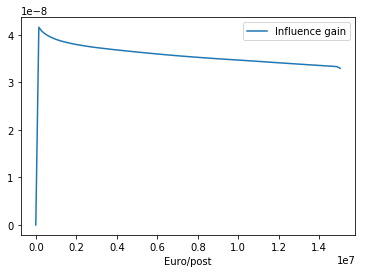

The maximun marginal influence gain found with 100 steps is with a budget of 150311.49618113475 Euro per time unit


In [37]:
Step=100
SizeE=OT/Step
OSX=list()
OSX.append(0)
for j in range(Step):
    aux=OSP(N,Lead,Lvec,Mvec,(j+1)*SizeE,1,i,f=faux)
    OSX.append(abs(aux[0]["fun"])/((j+1)*SizeE))
    #print(j)
listaux=range(math.floor(OT))
listaux=[x*OT/Step for x in range(Step)]
listaux.append(OT)
datas={'Influence gain':OSX,'Euro/post':listaux}
df = pd.DataFrame(datas)
print("                   Marginal Utility")
df.plot(x='Euro/post',y='Influence gain')
plt.show()
print("The maximun marginal influence gain found with",Step,"steps is with a budget of",listaux[np.argmax(OSX)],"Euro per time unit")